# Data Analysis

In [ ]:
import pandas as pd

df = pd.DataFrame(pd.read_csv('/content/customer_churn_data.csv'))

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [ ]:
df['InternetService'] = df['InternetService'].fillna(" ")

In [ ]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [ ]:
numeric_columns_data = df.select_dtypes(include=['number'])
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [ ]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [ ]:
import matplotlib.pyplot as plt

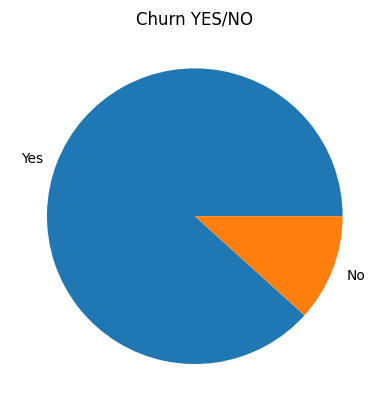

In [ ]:
df['Churn'].value_counts().plot(kind="pie")
plt.title("Churn YES/NO")
plt.ylabel("")

plt.show()

In [ ]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [ ]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


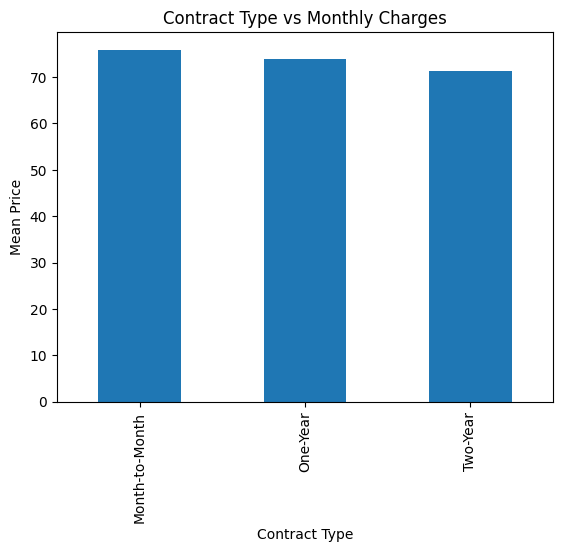

In [ ]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type vs Monthly Charges")
plt.show()

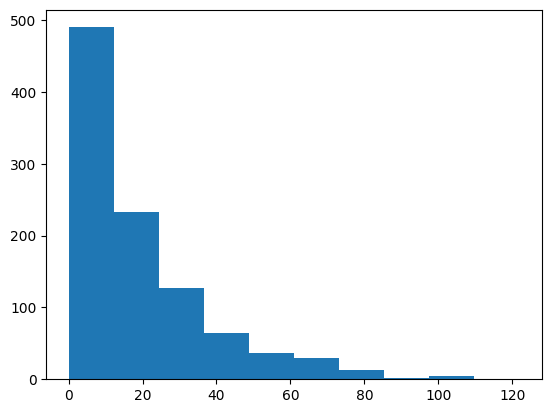

In [ ]:
plt.hist(df["Tenure"])
plt.show()

# Feature Engineering

In [ ]:
y = df["Churn"]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [ ]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x=="Female" else 0)

In [ ]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [ ]:
type(x["Gender"][0])

numpy.int64

In [ ]:
y=y.apply(lambda x: 1 if x=="Yes" else 0)

In [ ]:
type(y[0])

numpy.int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [ ]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy score: {}".format(accuracy_score(y_test, predictions)))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)
modelperformance(y_pred)

Accuracy score: 0.875


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid =  {
    "n_neighbors": [3.5,7,9],
    "weights": ["unifrom","distance"]
}

In [ ]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [ ]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3.5, 7, 9],
                         'weights': ['unifrom', 'distance']})

In [ ]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
y_pred = gridkn.predict(x_test)

In [ ]:
modelperformance(y_pred)

Accuracy score: 0.855


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel":["linera","rbf","poly"]
}

In [ ]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [ ]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linera', 'rbf', 'poly']})

In [ ]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [ ]:
y_pred = gridsvc.predict(x_test)

In [ ]:
modelperformance(y_pred)

Accuracy score: 0.88


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [ ]:
gridtree = GridSearchCV(DecisionTreeClassifier(), param_grid , cv=5)

In [ ]:
gridtree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
gridtree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [ ]:
y_pred = gridtree.predict(x_test)

In [ ]:
modelperformance(y_pred)

Accuracy score: 0.85


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]
}

In [ ]:
grid_rfc = GridSearchCV(rfc,param_grid,cv =5)

In [ ]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [ ]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [ ]:
y_pred = grid_rfc.predict(x_test)

In [ ]:
modelperformance(y_pred)

Accuracy score: 0.87


In [ ]:
best_model = gridsvc.best_estimator_

In [ ]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [ ]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')